In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def predicted(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8):
    s=x1*w1+x2*w2+x3*w3+x4*w4+x5*w5+x6*w6+x7*w7+x8*w8
    if s>=0.6:
        return 1
    else:
        return 0    

In [4]:
def error(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8,y):
    return y-predicted(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8)

In [5]:
def lossfun(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8,y):
    sum=0
    for i in range(len(x1)):
        sum=sum+error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])
    return sum

In [6]:
def training(x1,x2,x3,x4,x5,x6,x7,x8,y,lr,iw1,iw2,iw3,iw4,iw5,iw6,iw7,iw8):
    w1=iw1
    w2=iw2
    w3=iw3
    w4=iw4
    w5=iw5
    w6=iw6
    w7=iw7
    w8=iw8
    losslist=[]
    for epoch in (range(200)):
        loss=lossfun(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8,y)
        losslist.append(loss)
        for i in range(len(x1)):
            w1=w1+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x1[i]
            w2=w2+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x2[i]
            w3=w3+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x3[i]
            w4=w4+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x4[i]
            w5=w5+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x5[i]
            w6=w6+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x6[i]
            w7=w7+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x7[i]
            w8=w8+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x8[i]
    return w1,w2,w3,w4,w5,w6,w7,w8,losslist 

In [7]:
def linepoints(x1,w1,w2,w3,w4,w5,w6,w7,w8,th):
    x2=[]
    for i in range(len(x1)):
        x2.append((0.5-x1[i]*w1-x3[i]*w3-x4[i]*w4-x5[i]*w5-x6[i]*w6-x7[i]*w7-x8[i]*w8)/w2)
    return x2

In [9]:
df = pd.read_csv('diabetes.csv')

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
x1 = df['Pregnancies'].values
x2 = df['Glucose'].values
x3 = df['BloodPressure'].values
x4 = df['SkinThickness'].values
x5 = df['Insulin'].values
x6 = df['BMI'].values
x7 = df['DiabetesPedigreeFunction'].values
x8 = df['Age'].values

In [14]:
y = df['Outcome'].values

In [15]:
w1,w2,w3,w4,w5,w6,w7,w8,losses = training(x1,x2,x3,x4,x5,x6,x7,x8,y,0.001,0.2,0.11,0.1,0.2,0.1,0.2,0.1,0.2)

In [16]:
print(w1,w2,w3,w4,w5,w6,w7,w8)

1.3950000000000922 0.1630000000000326 -0.30599999999997785 0.18300000000000058 -0.07600000000000671 0.14769999999999867 0.10680800000000208 -0.2860000000000421


In [17]:
for i in range(len(x1)):
    print(predicted(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8))

1
0
1
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
1
0
1
1
0
0
0
0
0
0
0
1
0
1
1
1
0
1
1
0
0
1
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
1
0
1
1
0
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
1
1
1
0
1
1
1
1
0
1
0
1
1
0
1
1
1
0
0
1
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
1
0
0
1
0
0
1
0
1
0
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0


In [18]:
epochs=[x for x in range(len(losses))]

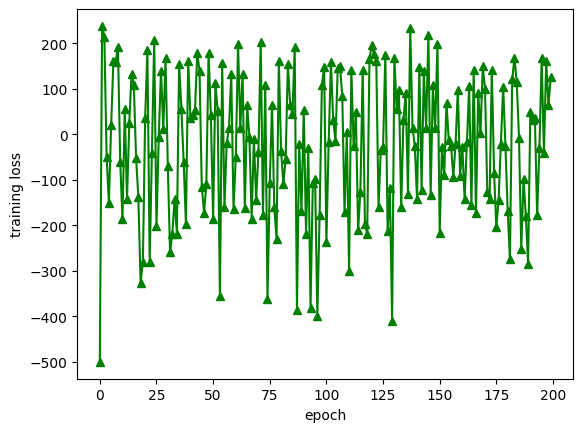

In [23]:
plt.plot(epochs,losses,color='g',marker='^')
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.show()

In [24]:
print(losses)

[-500, 238, 214, -49, -150, 20, 161, 159, 192, -61, -187, 55, -143, 25, 133, 109, -52, -138, -326, -280, 35, 185, -281, -41, 208, -202, -6, 140, 11, 167, -69, -259, -218, -142, -218, 154, 56, -61, -197, 162, 36, 42, 54, 178, 139, -116, -172, -110, 179, 43, -185, 112, 52, -356, 156, -160, -19, 13, 133, -164, -51, 198, 14, 133, -163, 65, -5, -185, -11, -144, -40, 202, -177, 109, -362, -107, 65, -160, -230, 162, -36, -109, -54, 154, 65, 44, 191, -385, -22, -168, 54, -218, -30, -381, -107, -98, -400, -177, 108, 147, -236, -17, 158, 31, -14, 146, 149, 85, -171, 5, -301, 142, -25, 48, -210, -126, 141, -198, -219, 166, 195, 177, 162, -160, -35, -27, 174, -212, -117, -410, 167, 56, 98, -160, 32, 91, -131, 233, 13, -25, -143, 147, -122, 138, 14, 217, -133, 108, 13, 199, -216, -28, -89, 69, -13, -25, -93, -22, 98, -91, -28, -143, -18, 105, -156, 142, -173, 91, 3, 149, 100, -126, -143, 142, -84, -204, -144, -22, 104, -25, -168, -275, 121, 167, 114, -8, -251, -98, -179, -284, 49, 31, 36, -178, -31

In [25]:
print(w1,w2,w3,w4,w5,w6,w7,w8)

1.3950000000000922 0.1630000000000326 -0.30599999999997785 0.18300000000000058 -0.07600000000000671 0.14769999999999867 0.10680800000000208 -0.2860000000000421
